In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
d = pd.read_csv("./kaggle/input/insurance/insurance.csv")

In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()

In [5]:
d["sex"] = e.fit_transform(d["sex"])
d["smoker"] = e.fit_transform(d["smoker"])
d["region"] = e.fit_transform(d["region"])

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [7]:
d.corrwith(d["charges"])

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
dtype: float64

<Axes: >

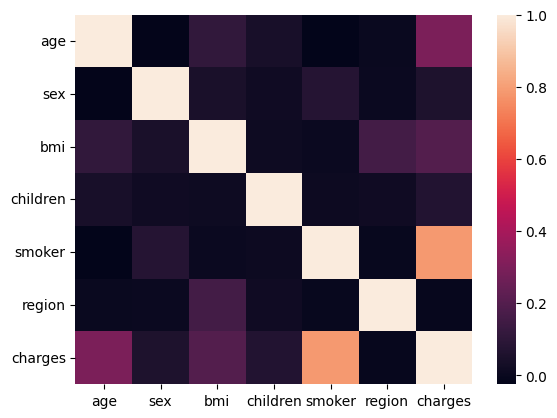

In [8]:
sns.heatmap(d.corr())

In [9]:
x = d.drop(columns="charges",axis=1)
y = d["charges"]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_test,y_test)
y_pred = model.predict(x_test)

In [12]:
from xgboost import XGBRegressor
model = XGBRegressor()

In [13]:
model.fit(x_test,y_test)
y_pred = model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9999867660261621